<a href="https://colab.research.google.com/github/sanjeev12-09/california-housing-prediction/blob/main/MLP_Regression(Normal).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

from sklearn.metrics import mean_squared_error

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
np.random.seed(306)
plt.style.use('seaborn')

In [3]:
shuffle_split_cv= ShuffleSplit(n_splits=10 , test_size=0.2, random_state =0)

# Step 1 Load Data

In [4]:
features, labels = fetch_california_housing(as_frame=True, return_X_y=True)

In [5]:
print("Shape of feature matrix :",features.shape)
print("Shape of label matrix :",labels.shape)

Shape of feature matrix : (20640, 8)
Shape of label matrix : (20640,)


In [6]:
assert features.shape[0] == labels.shape[0]

# Data preprocessing and model building

In [7]:
from sklearn.model_selection import train_test_split
train_features,test_features,train_labels,test_labels = train_test_split(features , labels , random_state=42)

In [8]:
print("# training set" ,train_features.shape[0])
print("# testing set" ,test_features.shape[0])

# training set 15480
# testing set 5160


**Pipeline : preprocessing + model**

In [13]:
lin_reg_pipeline= Pipeline([
                            ("feature scaling",StandardScaler()),
                            ("lin_reg",LinearRegression())
])
lin_reg_pipeline.fit(train_features,train_labels)

Pipeline(steps=[('feature scaling', StandardScaler()),
                ('lin_reg', LinearRegression())])

Now that we have trained the models . Lets check the learnt/estimated weight vector (intercept_ and coef_ )

In [10]:
print("intercept w_0",lin_reg_pipeline[-1].intercept_)
print(" coefficient (w_1,w_2,....,w_m)",lin_reg_pipeline[-1].coef_)

intercept w_0 2.0703489205426377
 coefficient (w_1,w_2,....,w_m) [ 0.85210815  0.12065533 -0.30210555  0.34860575 -0.00164465 -0.04116356
 -0.89314697 -0.86784046]


## **Model** **Evaluation**

# score

let's use score method to obtain train and test errors with twin objectives

In [14]:
test_score= lin_reg_pipeline.score(test_features , test_labels)
print("Model perfoemance on test set:",test_score)

train_score= lin_reg_pipeline.score(train_features , train_labels)
print("Model perfoemance on train set:",train_score)



Model perfoemance on test set: 0.5910509795491352
Model perfoemance on train set: 0.609873031052925


The *score* method returns r2 score whose best value is 1. The r2 score on train and test are comparable but they are not that high . It points to underfitting in model training.

# Cross validate score (cross_val_score)

In [23]:
lin_reg_score = cross_val_score(lin_reg_pipeline,
                                train_features,
                                train_labels,
                                scoring = 'neg_mean_squared_error',
                                cv= shuffle_split_cv)

#This will return !0 different scores one for each fold
print(lin_reg_score)

# we can take mean and standard deviation of the score and report it
print(f"\n score of linear regression model on the test set :\n"
      f"{lin_reg_score.mean(): .3f} +/- {lin_reg_score.std(): .3f}")

[-0.50009976 -0.52183352 -0.55931218 -0.52110499 -0.56059203 -0.50510767
 -0.52386194 -0.54775518 -0.5007161  -0.54713448]

 score of linear regression model on the test set :
-0.529 +/-  0.022


Now we convert the score into the error as follows ⚡

In [24]:
lin_reg_mse= -lin_reg_score
print(f"mse of linear regression model on the test set :\n"
      f"{lin_reg_mse.mean(): .3f} +/- {lin_reg_mse.std(): .3f}")

mse of linear regression model on the test set :
 0.529 +/-  0.022


# Cross Validation

we just calculated cross_val_score based on cross validation. It however returns only score for each fold .what if we also need to access the models trained in each fold along with some other statistics like train error for that fold?

**cross_validate** API to obtain them


In [20]:
lin_reg_cv_results= cross_validate(lin_reg_pipeline,
                                   train_features,
                                   train_labels,
                                   cv=shuffle_split_cv,
                                   scoring=("neg_mean_squared_error"),
                                   return_train_score = True,
                                   return_estimator = True,
                                   )

The lin_reg_cv_results is a dictionary with following contents:

*   trained_estimators
*   time taken for fitting (fit_time) and scoring(score_time) the models in cross validation,
*   training score(train_score) and 
*   test scores (test_score



In [21]:
lin_reg_cv_results

{'estimator': [Pipeline(steps=[('feature scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]

⛓ We compare training and test error to access generalisation process of our model. However training and test score is in lin_reg_cv_result. Multiply these score by -1 to get the error.

In [22]:
train_error = -1 * lin_reg_cv_results['train_score']
test_error = -1 * lin_reg_cv_results['test_score']
print(f"mean squarred error of linear regression model on the train set :\n"
      f"{train_error.mean(): .3f} +/- {train_error.std(): .3f}")
print(f"mean squarred error of linear regression model on the test set :\n"
      f"{test_error.mean(): .3f} +/- {test_error.std(): .3f}")

mean squarred error of linear regression model on the train set :
 0.519 +/-  0.006
mean squarred error of linear regression model on the test set :
 0.529 +/-  0.022


The trainning and test error are high ,which an indication of under fitting, which we will confirm by plotting the learning curve.


# Effect of training set size on error

In [16]:
def plot_learning_curve(train_sizes, train_score, test_score ):
  train_score_mean = np.mean(-train_score, axis=1)
  train_score_std = np.std(-train_score, axis=1)
  test_score_mean = np.mean(-test_score, axis=1)
  test_score_std = np.std(-test_score, axis=1)
  fit_times_mean = np.mean(fit_times, axis=1)
  fit_times_std = np.std(fit_times, axis=1)

  plt.fill_between(
      train_sizes,
      train_score_mean - train_score_std,
      train_score_mean + train_score_std,
      alpha= 0.1,
      color="r" ,)
  plt.fill_between(
      train_sizes,
      test_score_mean - test_score_std,
      test_score_mean + test_score_std,
      alpha= 0.1,
      color="g" ,)
  plt.plot(train_sizes,train_score_mean,"o-",color="r",label= "Training Score")
  plt.plot(train_sizes,test_score_mean,"o-",color="g", label= "cross validation score") 
  plt.xlabel("Training Example")
  plt.ylabel("MSE")
  plt.legend(loc="best")
  
 

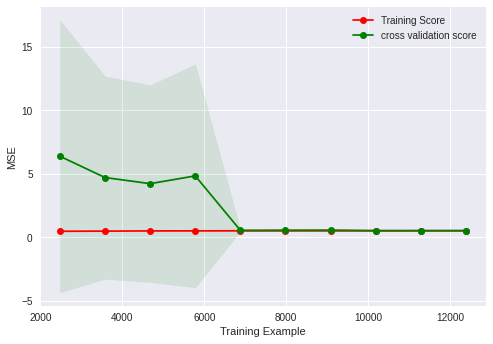

In [29]:
(train_sizes, train_score, test_score, fit_times, score_times)= \
  learning_curve(
      lin_reg_pipeline, train_features, train_labels, cv = shuffle_split_cv,
      scoring= "neg_mean_squared_error", n_jobs= -1,
      return_times= True, train_sizes = np.linspace(0.2, 1.0, 10))
  
plot_learning_curve(train_sizes,train_score, test_score)

# Model Examination

Lets examine the weight vectors and how much variability exist between them across different cross validated models

In [25]:
feature_names = train_features.columns
feature_names

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

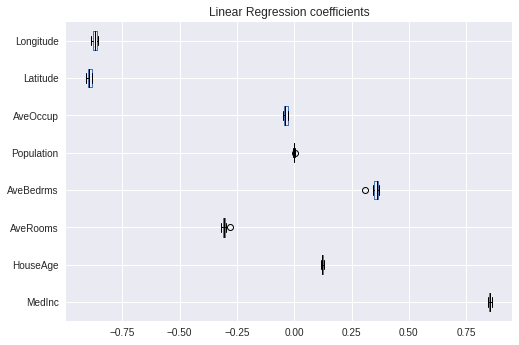

In [26]:
coefs = [est[-1].coef_ for est in lin_reg_cv_results["estimator"]]
weight_df = pd.DataFrame(coefs, columns= feature_names)

color = {"whiskers": "black", "medians": "black", "caps": "black"}
weight_df.plot.box(color = color, vert= False)
_ = plt.title("Linear Regression coefficients")

There is not much variability in weights learned by different models. It can also by standard deviation of weight as seen in **std** row below:


In [30]:
weight_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.852153,0.122770,-0.304384,0.353528,-0.001576,-0.037059,-0.894011,-0.869753
std,0.005763,0.004312,0.010998,0.018044,0.003254,0.008582,0.009975,0.009097
min,0.843517,0.117394,-0.318971,0.307474,-0.005787,-0.047584,-0.908058,-0.884206
25%,0.848871,0.119895,-0.310778,0.349715,-0.002688,-0.042486,-0.901411,-0.876542
50%,0.852711,0.121592,-0.305795,0.360139,-0.002063,-0.042325,-0.895370,-0.869631
75%,0.854743,0.125520,-0.302980,0.364646,-0.000350,-0.027562,-0.883967,-0.862110
max,0.861659,0.130560,-0.278426,0.367952,0.005297,-0.026331,-0.881884,-0.857844


# Selecting Best Model

Lets select the model with lowest cross validate test error as the best performing model. 

In [32]:
# lets find out the best model that resulted in least test error
best_model_index = np.argmin(test_error)
selected_model = lin_reg_cv_results['estimator'][best_model_index]

Lets examine the model coefficients

In [36]:
print("Intercept (w_0) :", selected_model['lin_reg'].intercept_)
print("coefficient (w_0,w_1,...,w_m) :", selected_model['lin_reg'].coef_)

Intercept (w_0) : 2.0779898917958657
coefficient (w_0,w_1,...,w_m) : [ 8.44324888e-01  1.18463901e-01 -3.04619574e-01  3.56620503e-01
  1.74458509e-04 -4.23964612e-02 -8.96045642e-01 -8.68906479e-01]


# Model Performance

In [37]:
from sklearn.model_selection import cross_val_predict
cv_predictions = cross_val_predict(lin_reg_pipeline, train_features, train_labels)

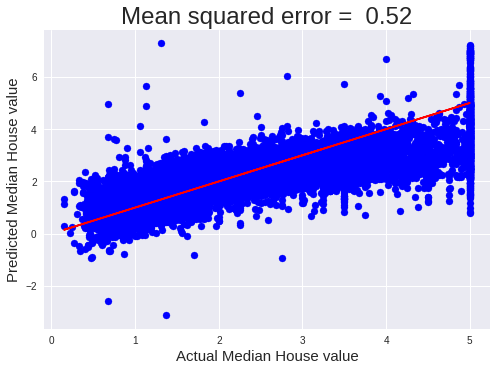

In [38]:
mse_cv = mean_squared_error(train_labels, cv_predictions)

plt.scatter(train_labels, cv_predictions, color= 'blue')
plt.plot(train_labels, train_labels, 'r-')
plt.title(f"Mean squared error = {mse_cv: .2f}",size=24)
plt.xlabel('Actual Median House value', size=15)
plt.ylabel('Predicted Median House value', size=15)
plt.show()

# Prediction

In [39]:
test_predictions_cv = selected_model.predict(test_features)
test_predictions_cv[:5]

array([0.73548515, 1.7725621 , 2.70011199, 2.83716602, 2.60743151])

we can also obtain predictions using initial model that we build without cross validation.

In [49]:
test_prediction = lin_reg_pipeline.predict(test_features)
test_prediction[:5]

array([0.72412832, 1.76677807, 2.71151581, 2.83601179, 2.603755  ])

# Report model performance

we report model performance on test set

In [51]:
score_cv = selected_model.score(test_features, test_labels)
score = lin_reg_pipeline.score(test_features, test_labels)

print("R2 score for the best model obtain via cross validation :", score_cv)
print("R2 score for the best model without cross validation :", score)

R2 score for the best model obtain via cross validation : 0.5923577635319088
R2 score for the best model without cross validation : 0.5910509795491352


Alternatively we can use any other metric of interest and report performance based on that. For example the mean squared error is as follows:

In [52]:
mse= mean_squared_error(test_labels, test_prediction)
mse_cv = mean_squared_error(test_labels, test_predictions_cv)

print("MSE for the best model obtain via cross validation :", mse_cv)
print("MSE for the best model without cross validation :", mse)

MSE for the best model obtain via cross validation : 0.5393995876218523
MSE for the best model without cross validation : 0.5411287478470688


⚖ The cross validation based model has slightly better MSE than other model